<a href="https://colab.research.google.com/github/KD-3/DeepLearningMovidiusNCS/blob/master/btp_cnn_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
!unzip "/gdrive/My Drive/Colab Notebooks/NEU-DET.zip" -d /content

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf


DATADIR_IMAGES = "/content/NEU-DET/IMAGES"
DATADIR_ANNOTATIONS = "/content/NEU-DET/ANNOTATIONS"
print(DATADIR_ANNOTATIONS)
for img in os.listdir("/content/NEU-DET"):
    print(os.path.join("/content/NEU-DET", img))
    print(os.path.join(DATADIR_ANNOTATIONS, img))
    break

/content/NEU-DET/ANNOTATIONS
/content/NEU-DET/IMAGES
/content/NEU-DET/ANNOTATIONS/IMAGES


/content/NEU-DET/IMAGES/inclusion_11.jpg


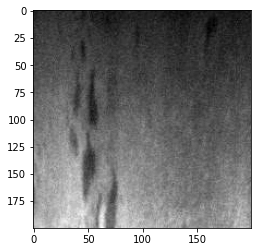

In [0]:
  for img in os.listdir(DATADIR_IMAGES):
    print(os.path.join(DATADIR_IMAGES, img))
    img_array = cv2.imread(os.path.join(DATADIR_IMAGES, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

In [0]:
from xml.etree import ElementTree

# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
  tree = ElementTree.parse(filename)
  root = tree.getroot()
  # extract each bounding box
  boxes = list()
  for box in root.findall('.//bndbox'):
    xmin = int(box.find('xmin').text)
    ymin = int(box.find('ymin').text)
    xmax = int(box.find('xmax').text)
    ymax = int(box.find('ymax').text)
    coors = [xmin, ymin, xmax, ymax]
    boxes.append(coors)
  # extract image dimensions
  width = int(root.find('.//size/width').text)
  height = int(root.find('.//size/height').text)
  return boxes, width, height

In [0]:
  for img in os.listdir(DATADIR_ANNOTATIONS):
    print(os.path.join(DATADIR_ANNOTATIONS, img))
    boxes, w, h = extract_boxes(os.path.join(DATADIR_ANNOTATIONS, img))
    print(boxes, w, h)
    break

  training_data = []

/content/NEU-DET/ANNOTATIONS/crazing_158.xml
[[51, 57, 125, 135]] 200 200


In [0]:
!pip install opencv-python==4.1.2.30
!pip install keras==2.3.1
%tensorflow_version 1.x
!pip install imageai --upgrade #necessary

TensorFlow is already loaded. Please restart the runtime to change versions.
Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


In [0]:
import tensorflow
print(tensorflow.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

Using TensorFlow backend.


In [0]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()

In [0]:
trainer.setDataDirectory(data_directory="/gdrive/My Drive/NEU-DET/NEU-DET")
trainer.setTrainConfig(object_names_array=["crazing", "inclusion", "patches", "pitted_surface", "rolled-in_scale", "scratches"], batch_size=4, num_experiments=100, train_from_pretrained_model="/gdrive/My Drive/NEU-DET/NEU-DET/models/pretrained-yolov3.h5")

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.68
Anchor Boxes generated.
Detection configuration saved in  /gdrive/My Drive/NEU-DET/NEU-DET/json/detection_config.json


In [0]:
trainer.trainModel()

In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="NEU-DET")
trainer.evaluateModel(model_path="NEU-DET/models", json_path="NEU-DET/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)

## Image Generator Approach